In [410]:
# calculates NDVI from photo

In [563]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import glob
import math
import scipy
import sklearn
import pytesseract 
import png
import openmeta

FileNotFoundError: [Errno 2] No such file or directory: 'phenocamdata'

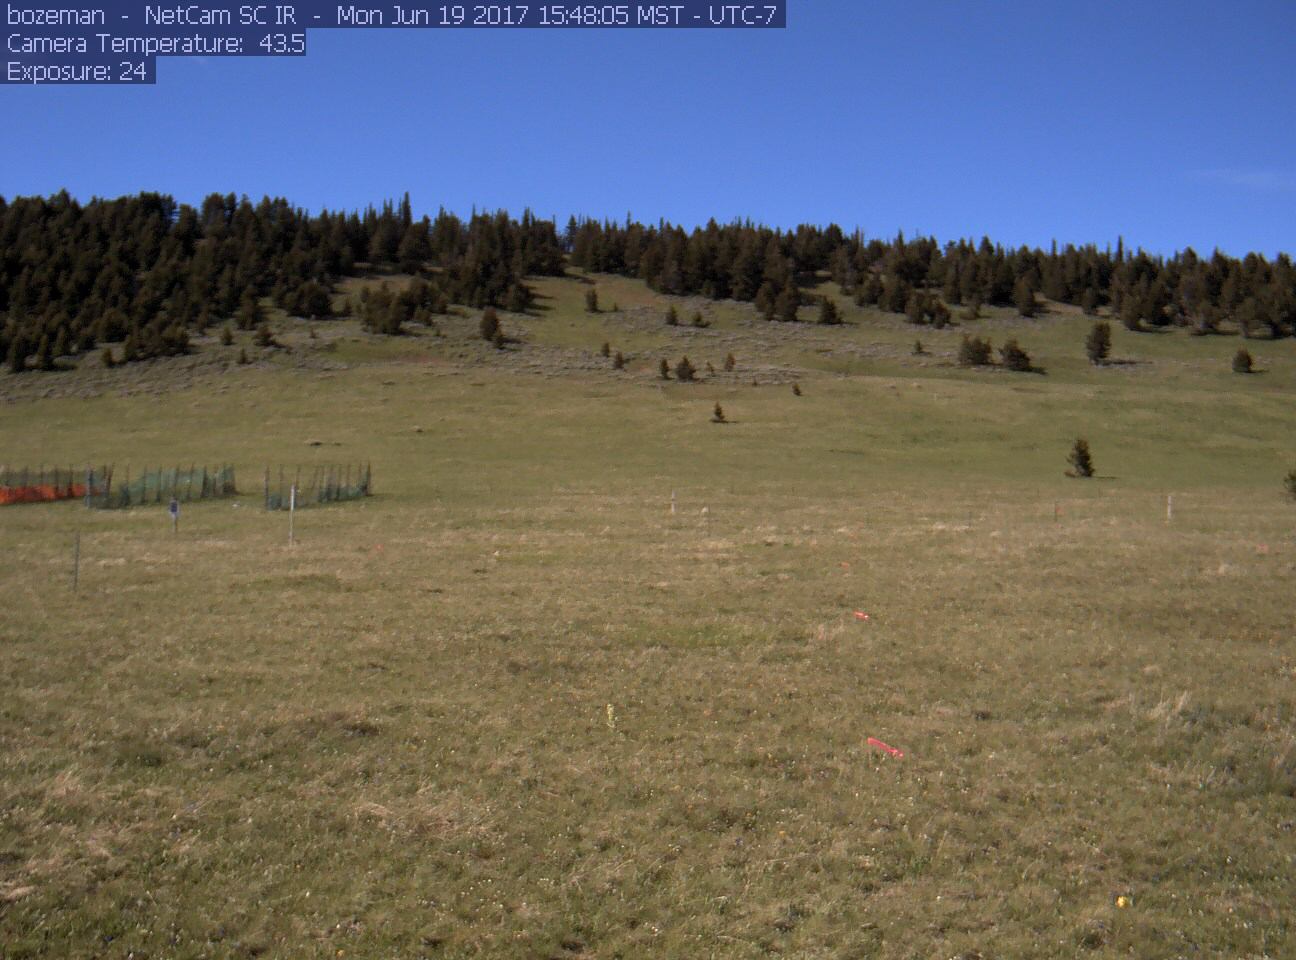

In [516]:
# import visual photo and finds all pixel values

vis_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_2017_06_19_154806.jpg'
response = requests.get(vis_photo)
VIS_img = Image.open(BytesIO(response.content))
vis_img_exp = vis_slice
width, height = VIS_img.size
vis_pixel_values = list(VIS_img.getdata())
vis_pixel_values = np.array(vis_pixel_values).reshape((width, height, 3))
VIS_img

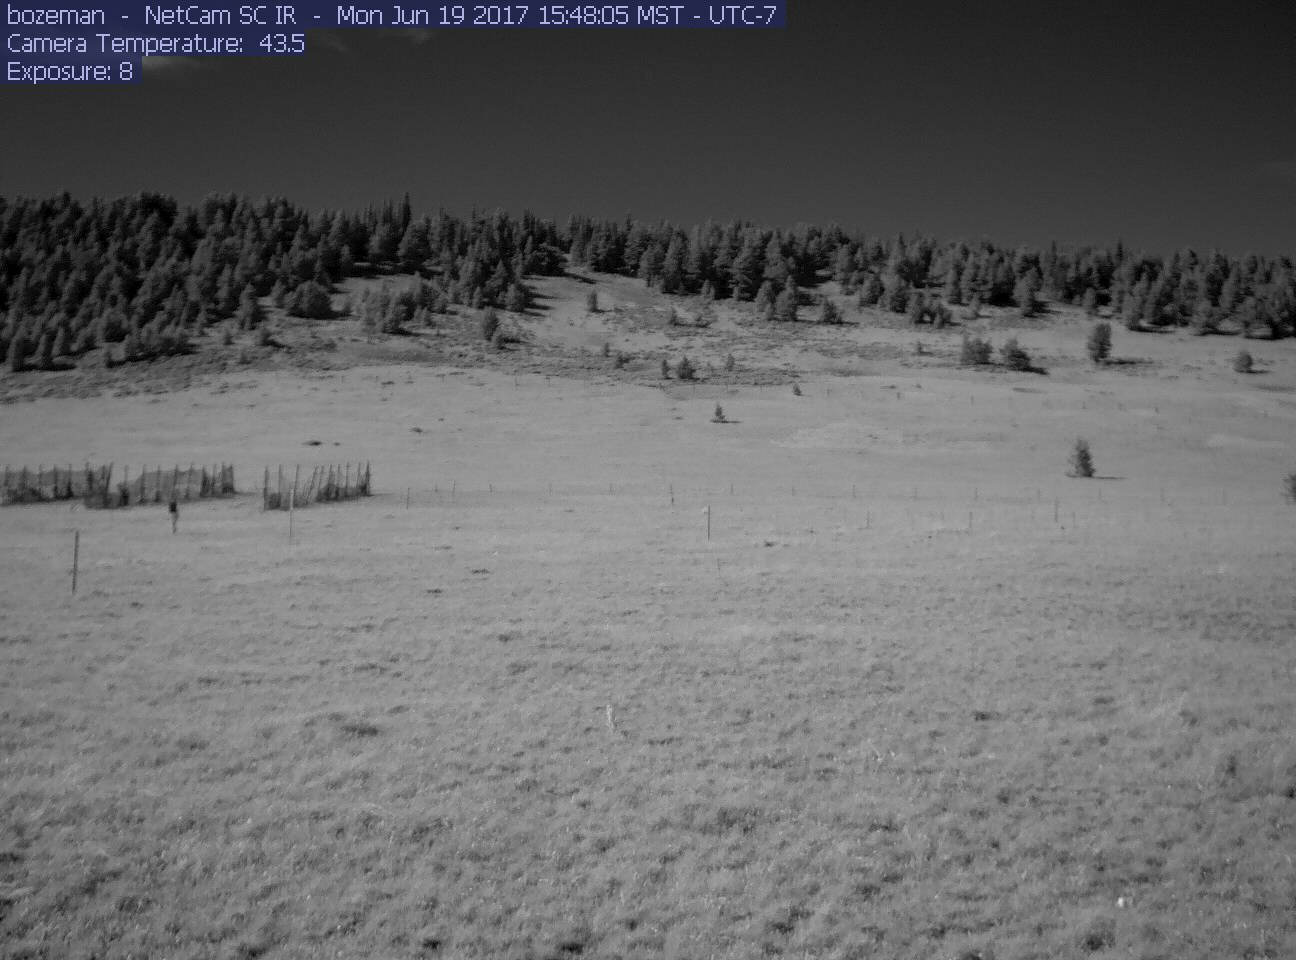

In [515]:
# import IR photo and finds all pixel values

ir_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_IR_2017_06_19_154806.jpg'
response = requests.get(ir_photo)
IR_img = Image.open(BytesIO(response.content))
IR_img_exp = ir_slice
width, height = IR_img.size
IR_pixel_values = list(IR_img.getdata())
IR_pixel_values = np.array(IR_pixel_values).reshape((width, height, 3))
IR_img

In [480]:
# break

In [481]:
# calculate r', blue values, green values

x=0
y=0
width,height = VIS_img.size

red_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        red_array[x,y] = vis_pixel_values[x,y,0]
r_prime = red_array/math.sqrt(vis_slice)

green_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        green_array[x,y] = vis_pixel_values[x,y,1]
        
blue_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        blue_array[x,y] = vis_pixel_values[x,y,2]

In [482]:
# calculating all IR values

x=0
y=0
width,height = IR_img.size
IR_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        IR_array[x,y] = IR_pixel_values[x,y,0]

In [483]:
# break

In [484]:
# finding x'

z = (red_array + green_array + blue_array) + IR_array
z_prime = z/math.sqrt(ir_slice)

y_array = 0.30*red_array + 0.59*green_array + 0.11*blue_array
y_prime = y_array/math.sqrt(ir_slice)

x_prime = z_prime - y_prime

In [561]:
# visual image exposure as int

vis_img_exp = VIS_img.crop((118, 58, 180, 85))
vis_exp_num = pytesseract.image_to_string(vis_img_exp,config='nobatch digits')
y = vis_exp_num[0:4]
vis_slice = int(y)
vis_img_exp

ValueError: invalid literal for int() with base 10: ''

In [523]:
# ir image exposure as int

ir_img_exp = IR_img.crop((115,58,180,85))
ir_exp_num = pytesseract.image_to_string(ir_img_exp, config = 'nobatch digits')
x = ir_exp_num[0:3]
ir_slice = int(x)
ir_img_exp
ir_slice

ValueError: invalid literal for int() with base 10: ''

In [536]:
# camera ndvi average

np.seterr(divide='ignore', invalid='ignore')
camera_ndvi = ((x_prime-r_prime) / (x_prime+r_prime))

camera_ndvi = xr.DataArray(camera_ndvi)

In [532]:
camera_ndvi.where()

In [540]:
camera_ndvi.mean()

AttributeError: 'DataArray' object has no attribute 'value'

In [545]:
ndvi_mean = camera_ndvi.mean()

In [553]:
camera_ndvi.median()

<xarray.DataArray ()>
array(0.4430082214942866)

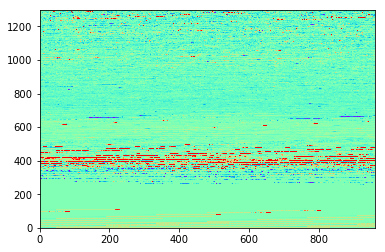

In [554]:
x = plt.pcolormesh(camera_ndvi, cmap=plt.cm.rainbow, vmin = ndvi_mean-0.2, vmax = ndvi_mean+0.2)